In [3]:
import os
import re

def simple_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower().split()

def load_all_txt_files(base_path, limit=None):
    all_sentences = []
    count = 0

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    for line in f:
                        line = line.strip()
                        if line:
                            tokens = simple_tokenize(line)
                            all_sentences.append(tokens)
                            count += 1
                            if limit and count >= limit:
                                return all_sentences
    return all_sentences


data_path = r"C:\Users\LENOVO\Downloads\data\data"  
sentences = load_all_txt_files(data_path, limit=1000000) 
print(f"Loaded {len(sentences)} sentences.")


Loaded 1000000 sentences.


In [1]:
pip install numpy scipy gensim

  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl (24.0 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl (38 kB)

   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- -------------------------

In [4]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    sg=1,
    negative=10,
    min_count=5,
    workers=4
)

model.train(sentences, total_examples=len(sentences), epochs=15)

print("✅ Word2Vec model trained.")

✅ Word2Vec model trained.


In [5]:
test_words = ["حب", "مغرب", "خدمة", "بزاف", "صاحب"]

for word in test_words:
    try:
        print(f"\nMost similar to '{word}':")
        print(model.wv.most_similar(word, topn=5))
    except KeyError:
        print(f"'{word}' not in vocabulary.")


Most similar to 'حب':
[('اعجاب', 0.7478747367858887), ('وغرام', 0.7112788558006287), ('شوق', 0.7092379927635193), ('اشتياق', 0.7027706503868103), ('الحب', 0.7005608677864075)]

Most similar to 'مغرب':
[('اجتمااع', 0.625593364238739), ('مناسك', 0.6067566275596619), ('لابريكاد', 0.6012264490127563), ('وإسبانيا', 0.5834299325942993), ('يتواجد', 0.5822140574455261)]

Most similar to 'خدمة':
[('تايقلبو', 0.7367392778396606), ('خدامينش', 0.7276131510734558), ('246', 0.6559572815895081), ('الخدمة', 0.6472175717353821), ('181', 0.6376327872276306)]

Most similar to 'بزاف':
[('بزااف', 0.8987603187561035), ('بزاااف', 0.8765691518783569), ('بزااااف', 0.8158503770828247), ('بزاااااف', 0.722203254699707), ('وبزاف', 0.714264452457428)]

Most similar to 'صاحب':
[('لصاحب', 0.6534236669540405), ('المراد', 0.6532748937606812), ('بتاسمانا', 0.6528437733650208), ('للقديس', 0.6496128439903259), ('متقاعد', 0.6466520428657532)]


In [6]:
model.save("darija_word2vec.model")
model.wv.save_word2vec_format("darija_word2vec.vec", binary=False)

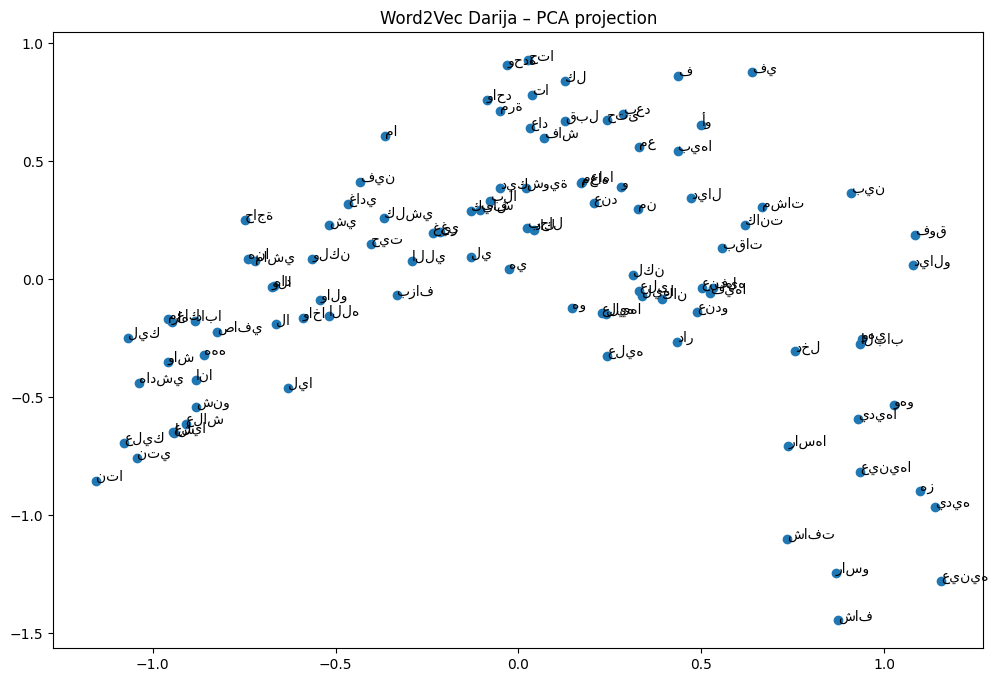

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.key_to_index.keys())[:100]
vectors = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec Darija – PCA projection")
plt.show()


In [13]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 453.5 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.1 MB 453.5 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.1 MB 453.5 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.1 MB 453.5 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.1 MB 453.5 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/8.1 MB 342.4 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/8.1 MB 342.4 kB/s eta 0:00:22
   --- ------------------------------------ 0

In [11]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -----------------